<a href="https://colab.research.google.com/github/estrella-celeste/ColabNoteboook/blob/main/EstrDiazU3proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Let's import the preliz library
!pip install "preliz[full,notebook]"
import preliz as pz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.9/509.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0


##**Unit 3 Project by Estrella Diaz-Mendoza**

Today's topic is ...

|

|

|

|

|

|

|

|

|

|

|

|

v

**ANIME!!!!!!!**

If you don't know about anime, then here is a short introduction.

Anime is short for animation and is mostly associated with Japanese film and televised media that can range from a children's audience to an adult's audience. When people say 'they watch anime', they are saying that they like to watch Japanese animated films or shows.

Anime has gotten very popular ever since COVID-19 and it was one of the things I would often watch during that time. Though, I don't watch it that often because of school. Unfortunately, I am dealing with senioritis and I want to watch an anime. Since I'm not a frequent watcher, I want to find a short anime to watch.


With my experience with anime, I have observed that a season is either 12 episodes or 24 episodes. But this is only based on the couple of animes I  have watched.

So here is my question:

 **What is the true average number of episodes in a season of a televised anime series?**

Because the school district has blocked all the reliable websites, and disabled inspect on school chromebook, so, even if I found a reliable website with a data set, I cannot get the csv link and import it into Colab or Sheets. So I decided to use the data from multiple Wikipedia articles and imported into Google Sheets using the import html function. Obtaining data with limited functions is annoying.

So now I am going to choose a likelihood.

In [2]:
import pandas as pd

In [3]:
#I uploaded cvs file from local drive into Google Colab
#Somehow Google Drive is a local drive in Chromebook
#Can't synchronize Colab to Google Sheets because school district doesn't allow it
#Chromebook I work in is school issued :(
#Code is from this website -> https://colab.research.google.com/notebooks/io.ipynb#scrollTo=BaCkyg5CV5jF

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AnimeEpisodeData - Sheet1 (2).csv to AnimeEpisodeData - Sheet1 (2).csv
User uploaded file "AnimeEpisodeData - Sheet1 (2).csv" with length 13696 bytes


In [5]:
#I need to save data into pandas data set
#csv file must match the code line below in order to work
#File name founded on code output above inside quotation marks
#Code is from this website -> https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92#:~:text=2)%20From%20a%20local%20drive&text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file).

import io
AnimeEP = pd.read_csv(io.BytesIO(uploaded['AnimeEpisodeData - Sheet1 (2).csv']))

In [6]:
#Here is our data
AnimeEP

,Episodes
0,13
1,13
2,13
3,12
4,51
...,...
3422,14
3423,25
3424,12
3425,4


Now that the data is imported, there is a lot of data and different values. So I am going to plot the data in a histogram.

(array([3.143e+03, 2.530e+02, 2.000e+01, 4.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([  1. ,  48.4,  95.8, 143.2, 190.6, 238. , 285.4, 332.8, 380.2,
        427.6, 475. ]),
 <BarContainer object of 10 artists>)

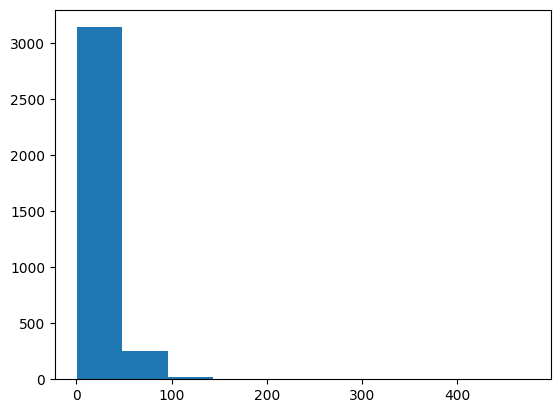

In [7]:
#Import this or plt won't work
import matplotlib.pyplot as plt
#Plotting histogram
plt.hist(AnimeEP)

Since we had a very, very large data set, the histogram came out like this. The histogram shows that the points are skewed to the left. It also shows that about 3000 shows have episodes less than 50 episodes. The histogram is very different from the normal distribution model.

Since the histogram is skewed to the left we are going to use an exponential for the prior.

<Axes: >

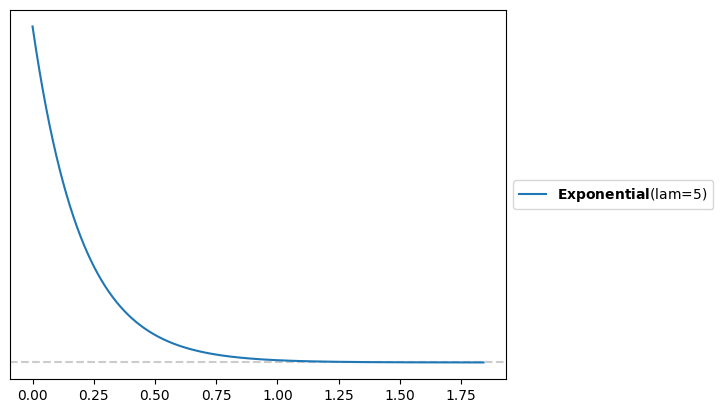

In [8]:
#Exponential Prior
pz.Exponential(lam=5).plot_pdf()

The prior sort of looks like the histogram shape. I will input the exponential prior and data to model the posterior in a pymc model and see if it is a good model.

In [9]:
import pymc as pm

In [10]:
#Posterior 1
#We are using the exponential prior in this one
with pm.Model() as model_AnimeEP:
    #Recording Exponential prior
    μ = pm.Exponential('μ', lam=5)

    #posterior with likelihood and one prior
    Episodes = pm.Normal('Episodes', mu= μ, observed=AnimeEP)
    idata_AnimeEP1 = pm.sample()

Output()

Output()

In [11]:
import arviz as az

<Axes: title={'center': 'μ'}>

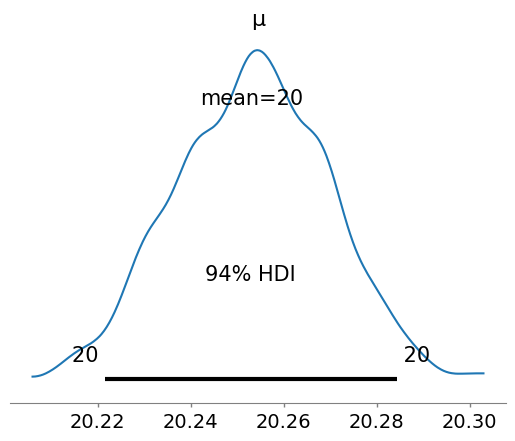

In [12]:
#Plotting posterior model 1
az.plot_posterior(idata_AnimeEP1)

I plotted the posterior with the normal distribution using an exponential prior. The model doesn't look that right, since the mean is the same as the left and right values. I will check the model using the ppc and hope to see if this posterior is a good model.

In [13]:
#ppc check 1
pm.sample_posterior_predictive(idata_AnimeEP1, model=model_AnimeEP, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Episodes'>

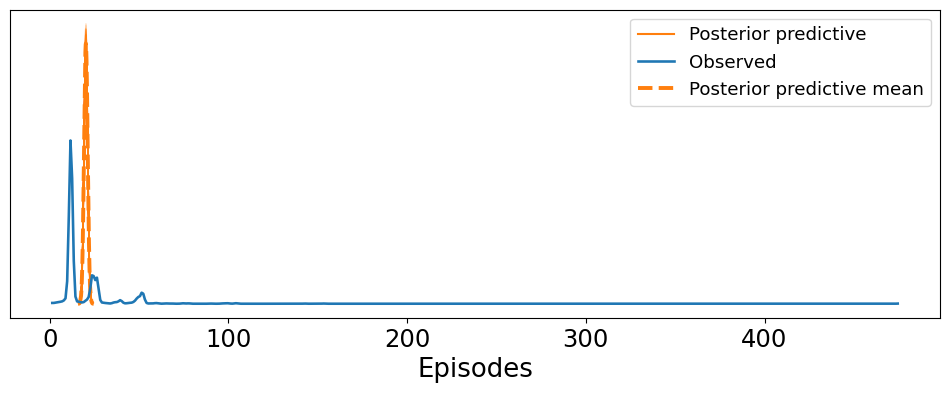

In [14]:
#Plotting ppc1
az.plot_ppc(idata_AnimeEP1, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

Based on the ppc above, it seems that this predictive model is not bad but not good. Looking at the posterior predictive mean and the posterior predictive is around to the posterior mean. Though the posterior predictive doesn't extend to all areas. Based on the plotted data, it doesn't look exponential. So I will put the exponential prior aside just this is the correct prior. I am thinking of using a normal prior to compute the posterior.

Since my data is not exponential, I looked back at my data set and tried to figure out why it extended to more than 400 episodes. I found that my data has 2 data points (475 and 425) that are outliers. These animes don't have seasons or each episode has a very short run time like 1 minute or 5 minutes.

So I'm going to use a the half normal distribution since it is similar in shape as the histogram. I also learned that that sigma = standard deviation, so I used 10 because why not.

<Axes: >

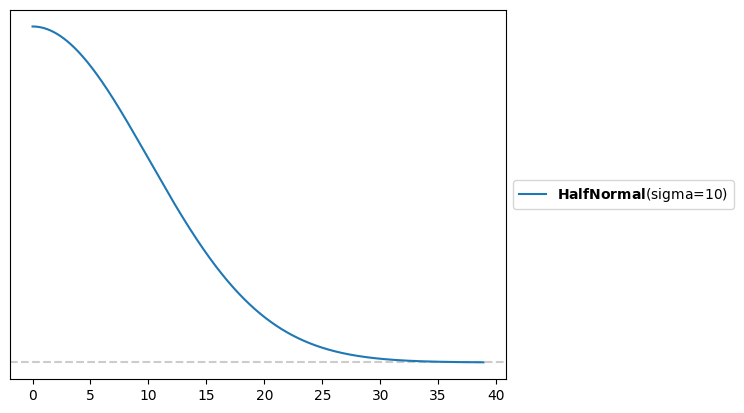

In [15]:
#Half Normal prior
pz.HalfNormal(sigma=10).plot_pdf()

In [16]:
#Posterior 2
with pm.Model() as model_AnimeEP2:
    μ = pm.HalfNormal('σ', sigma=10)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Episodes', mu = μ, observed=AnimeEP)
    idata_AnimeEP2 = pm.sample()

Output()

Output()

<Axes: title={'center': 'σ'}>

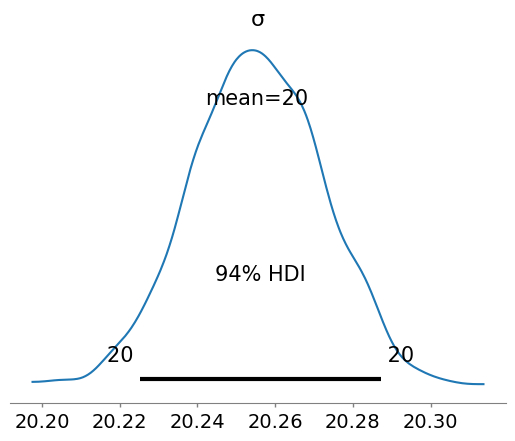

In [17]:
#Plotting posterior model 2
az.plot_posterior(idata_AnimeEP2)

Well, I am surprised that this posterior ended the same way as the first posterior. I think the model will come out the same as the last model.

In [18]:
#ppc check 2
pm.sample_posterior_predictive(idata_AnimeEP2, model=model_AnimeEP2, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Episodes'>

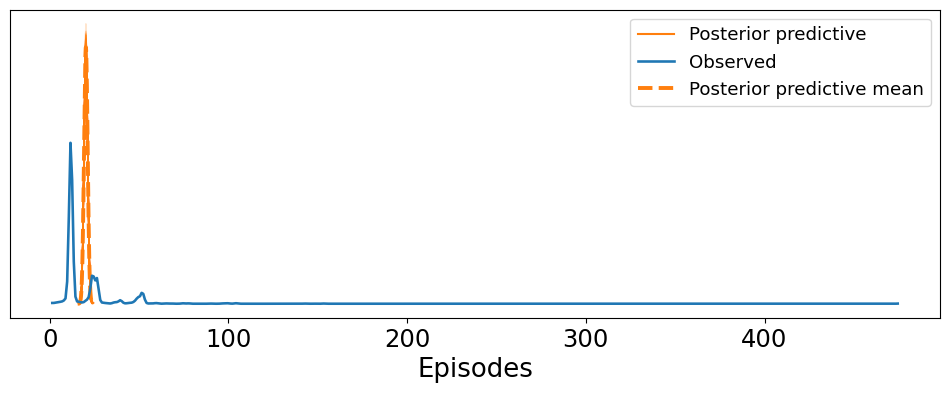

In [29]:
#Plotted ppc 2
az.plot_ppc(idata_AnimeEP2, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

The model did come out like the last model. So based on both models, I think the prior is the exponential and halfnormal prior. So I am going to put both priors while calculating the posterior. I hope this will improve the model.

In [54]:
#Posterior 3
with pm.Model() as model_AnimeEP3:
    μ = pm.Exponential('μ', lam=5)

    #this one is new, but its exactly what it sounds like: half of a normal dist
    σ = pm.HalfNormal('σ', sigma=10)

    #our fancy new likelihood, with two priors
    Y = pm.Normal('Episodes', mu = μ, sigma = σ, observed=AnimeEP)
    idata_AnimeEP3 = pm.sample()

Output()

Output()

array([<Axes: title={'center': 'μ'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

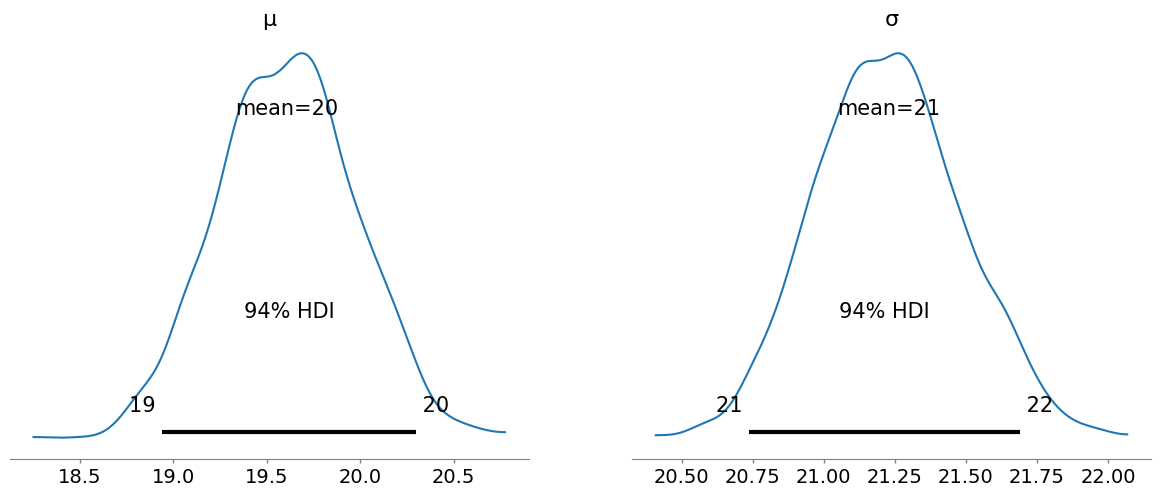

In [62]:
#Plotting posterior model 3
az.plot_posterior(idata_AnimeEP3)

We get two posteriors that are very similar. They have almost the same mean (posterior with exponential prior shows a mean = 20 while posterior with half normal prior has a mean = 21) and have the same shape, though the half normal distribution is shifted to the left.

In [63]:
#ppc check 3
pm.sample_posterior_predictive(idata_AnimeEP3, model=model_AnimeEP3, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Episodes'>

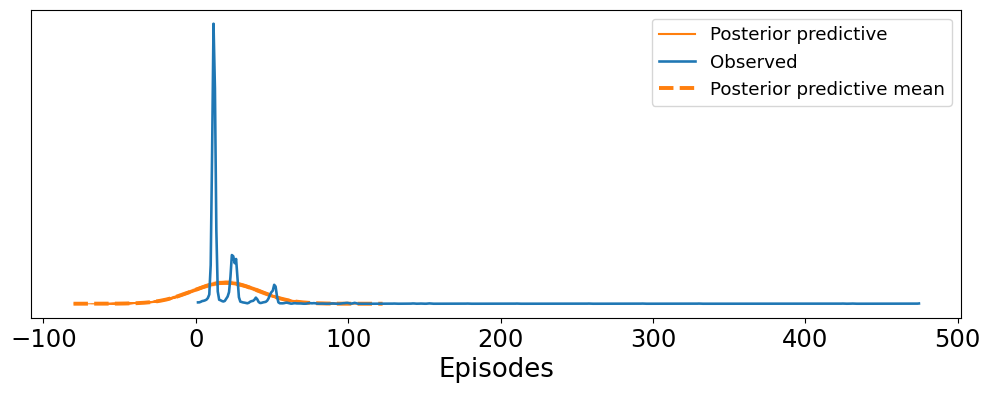

In [64]:
#Plotting ppc 3
az.plot_ppc(idata_AnimeEP3, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])


I don't like this >:(

The model shows the posterior predictive mean to go on the negative side of the spectrum which applying to reality its's not possible. I don't know if the shape of the posterior predictive mean should match or be similar to the shape of the observed data in this model but I will say this makes the model innacurate or bad. I'm not sure how the halfnormal and exponential prior made the posterior predictive curve look like the normal distribution curve. This model is not it.

I don't know what to do more so I'll conclude here.

In conclusion...Nevermind, there is still hope. I will try something else before I conclude.

Another distribution that has a right skew would be a lognormal distribution. So let's try it out as a prior before I give up.

The lognormal distribution has a right skew with mu = location parameter and sigma = standard deviation greater than 0. I don't know what location parameter is so let's put a definition here for future me and future mind.

Location parameter is a scalar or vector value that shows the 'location' or shift of distribution. (This is from Wikipedia)

Here we go! Don't fail me Colab.

<Axes: >

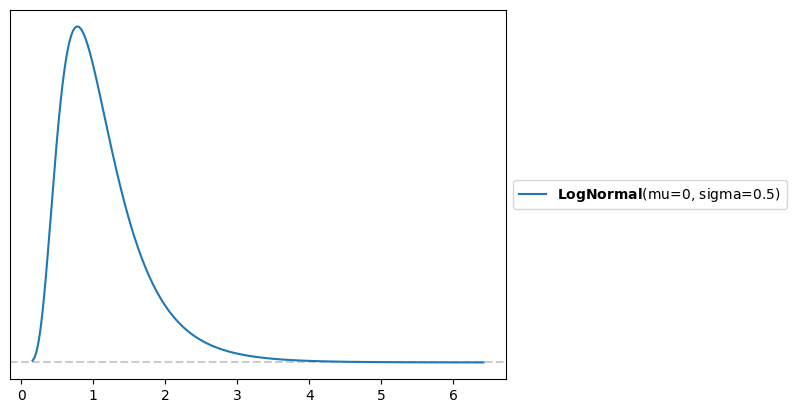

In [50]:
#Lognormal prior
pz.LogNormal(mu=0, sigma=.5).plot_pdf()

Okay, looking at this prior and here are my thoughts:

*  This prior looks very promising
*  The shape of prior is very similar to the histogram and looks better than the exponential prior.
*  I hope this works

I experimented a bit with the numbers and found that mu changes the intervals larger or shorter on the x-axis which also depends on the sigma value. Sigma only goes from 0 to 1 and greater than 1 it gives you half a square. It also determines location of the shape and mean.

I chose those numbers for mu and sigma because it portrays the shape of the data very well.


For my posterior I am going to use only the lognormal prior and see how the model turns out.

In [59]:
#Posterior 4
with pm.Model() as model_AnimeEP4:

    μ = pm.LogNormal('μ', mu=0, sigma=.5)

    Y = pm.Normal('Episodes', mu = μ, observed=AnimeEP)
    idata_AnimeEP4 = pm.sample()

Output()

Output()

<Axes: title={'center': 'μ'}>

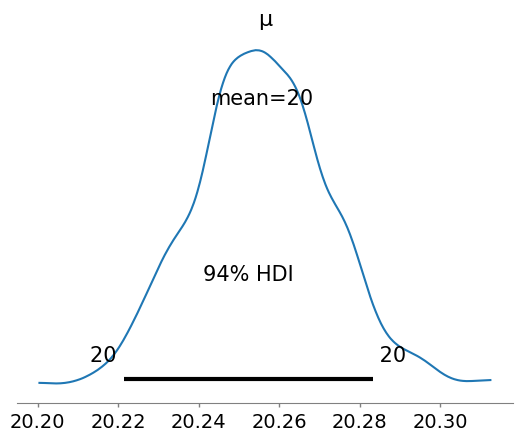

In [65]:
#Plotting posterior model 4
az.plot_posterior(idata_AnimeEP4)

The posterior is the same as the exponential one. It shows a mean = 20 and no shift of the left or right value.

In [66]:
#ppc check 4
pm.sample_posterior_predictive(idata_AnimeEP4, model=model_AnimeEP4, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='Episodes'>

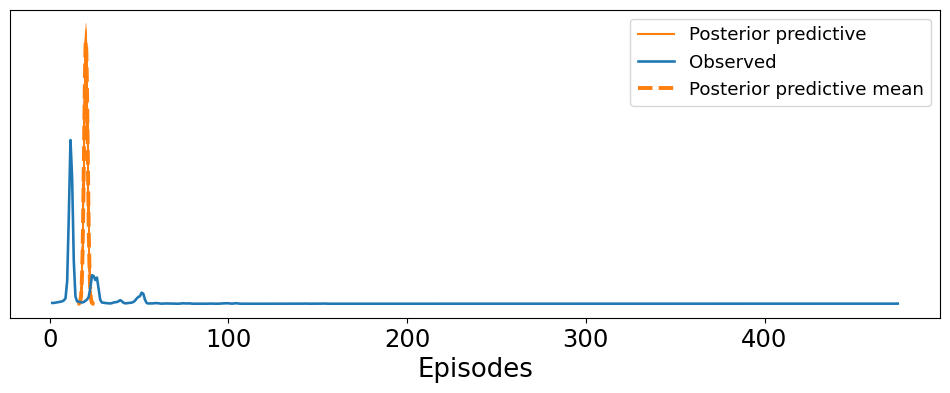

In [67]:
#Plotting ppc 4
az.plot_ppc(idata_AnimeEP4, num_pp_samples=100, figsize=(12, 4), colors=["C1", "C0", "C1"])

This is interesting but I was hoping for a change of something.

This model looks exactly the same as the model with the exponential prior because we got a posterior with an exponetial prior and a posterior with a lognormal prior have the same shape, mean and numbers on both ends of the curve which I forgot what they are called.

So far I am not surprised with my results but I don't think they look right.


Here is my conclusion:

Based on the predictive models above the priors that works the best are the exponential and the lognormal priors but it doesn't make the model look right. Alhough the posterior model 3 look more right but the ppc 3 didn't look right. Since there are outliers in the data, I don't know how to deal with them and the large amount of data made the model wonky which could have contributed on viewing the true shape of the histogram.

Now let's answer the question according to the models.
Based on the models in this project, the true average number of episodes in one season of a televised anime series is 20 episodes. So, it's more likely for an anime televised series to have an average of 20 episodes in one season.

I'm not sure if decreasing the data would have helped or taking away the outliers would have changed the model and the answer to the question.